# Multiple Regression

Multiple regression is like linear regression, but with more than one independent value, meaning that we try to predict a value based on two or more variables. Multiple regression is a statistical technique that can be used to analyze the relationship between a single dependent variable and several independent variables. The objective of multiple regression analysis is to use the independent variables whose values are known to predict the value of the single dependent value. Each predictor value is weighed, the weights denoting their relative contribution to the overall prediction.

$$
\Large \hat{y} = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_n x_n
$$

Here $\hat{y}$ is the dependent variable, and $x_1, x_2, ..., x_n$ are the $n$ independent variables. In calculating the weights, $\beta_0$, $x_1, x_2, ..., x_n$, regression analysis ensures maximal prediction of the dependent variable from the set of independent variables. This is usually done by least squares estimation.

In [1]:
import pandas as pd
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("./data/house_data.csv")
dataset.head()

,sqft,bedrooms,price
0,1180,3,3540000
1,2570,3,7710000
2,770,2,1540000
3,1960,4,7840000
4,1680,3,5040000


In [3]:
X = dataset.iloc[:,0:-1]
y = dataset.iloc[:,-1]
dataset.corr()

,sqft,bedrooms,price
sqft,1.000000,0.410243,0.945462
bedrooms,0.410243,1.000000,0.654177
price,0.945462,0.654177,1.000000


In [4]:
regr = linear_model.LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=42) 
regr.fit(X_train, y_train)
regr.score(X_test, y_test)

0.976264543946519

In [5]:
y_pred=regr.predict(X)
print("Predicted:\t", y_pred[:10])
print("Actual:\t\t", y.values[:10])

Predicted:	 [ 3488660.82843106  8375217.66544624   329918.68771236  7948141.12000992
  5246415.08635019 20111800.5848103   5369457.88440453  3066799.80653047
  5597965.93793402  5984671.87467623]
Actual:		 [ 3540000  7710000  1540000  7840000  5040000 21680000  5145000  3180000
  5340000  5670000]


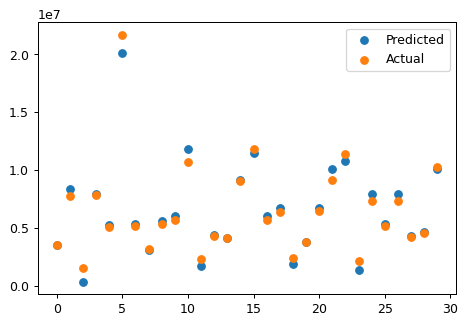

In [6]:
plt.figure(dpi=90)
plt.scatter(range(y_pred.size), y_pred, label="Predicted")
plt.scatter(range(y_pred.size), y, label="Actual")
plt.legend()